# Patterns


In this lab we use the theme of 'Patterns' to introduce a variety of things which can be done using JNBs:

<h4> 1. Patterns in Nature</h4> 
<ul style="list-style: none;">
    <li> a) Display an image </li>
    <li> b) Display a YouTube video</li>
</ul>
<h4>2. (Exploratory Data Analysis)  Patterns in Societal Data</h4>
<ul style="list-style: none;">
    <li> Make a scatterplot with OLS Regression line</li>
</ul>
  
<h4> 3. (Undergrad Math)  Patterns in Mathematics</h4>
<ul style="list-style: none;">
    <li> Trace a parametric curve </li>
    <li> Plot quadric surfaces and level curves </li>
</ul>

<h4> 4. (REU)  Applying Mathematics Patterns to Nature and Society</h4>
<ul style="list-style: none;">
    <li> Identify streamlines of polluted and fresh water flow</li>


In [1]:
#Import libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation
from mpl_toolkits.mplot3d import axes3d

<h3> 1. Patterns in Nature</h3>

Patterns in nature are interesting and beautiful. 

a) Here is a NASA Hubble photograph of an exploding supernova.

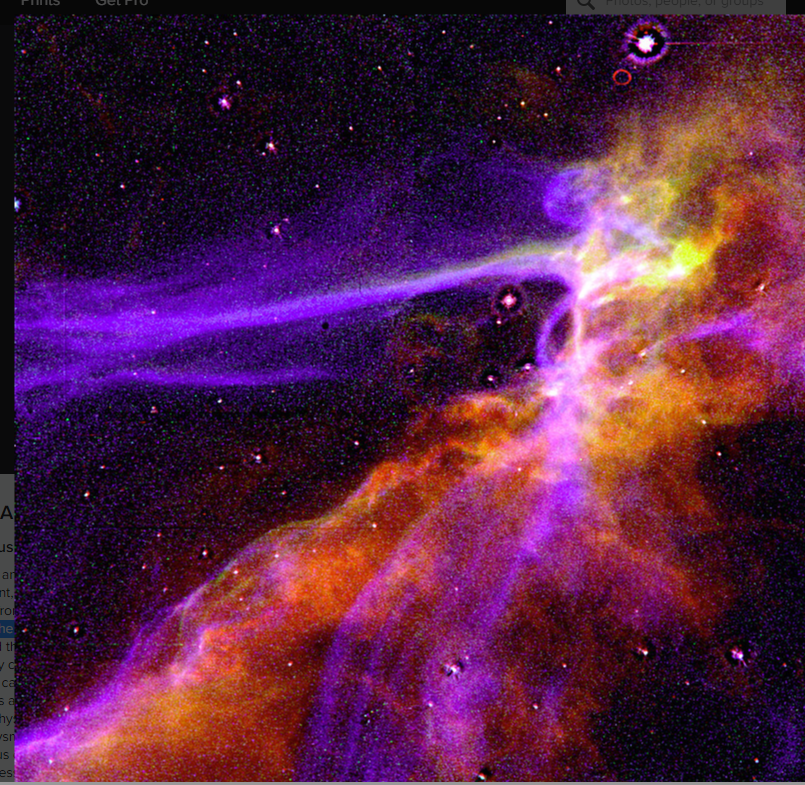

In [2]:
from IPython.display import Image
Image(filename='supernova.png',width=100,height=100)

<b> Exercise 1a) </b>Display another beatiful natural pattern shown in the file 'MtFuji.png'.

In [3]:
from IPython.display import Image
Image(filename='MtFuji.png',width=100,height=100)

b) Patterns can arise arise in natural dynamical systems. For example, here is a scene of waves shown in the YouTube video https://www.youtube.com/watch?v=J7pBztjUqUc&t=14s

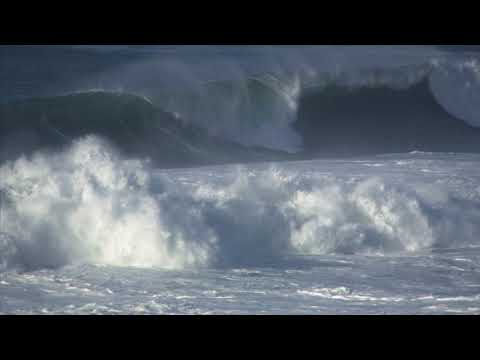

In [4]:
from IPython.display import YouTubeVideo
YouTubeVideo('J7pBztjUqUc',width=100,height=100)

<b>Exercise 1b)</b> Display another video of a dynamic pattern from nature shown in the YouTube video https://www.youtube.com/watch?v=oYEtLQ3lEH0&t=5s.

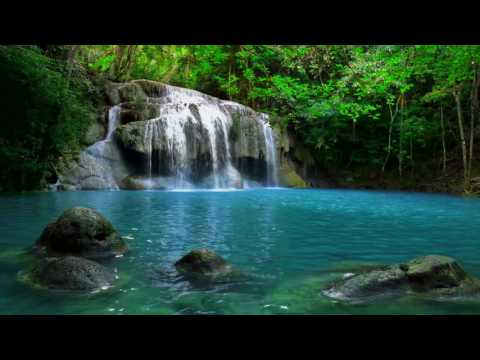

In [5]:
from IPython.display import YouTubeVideo
YouTubeVideo('oYEtLQ3lEH0',width=100,height=100)

<h3> 2. Patterns in Societal Data </h3>  

Individual people, groups, and societies as a special part of the natural world give rise to patterns which can be analyzed using data. 
Here is an example using schools in zip code 60623. (See Session 2 JNB3 OLS Linear Regression.)

<b>STEP ONE:</b> Read in CPS Data from the Chicago Data Portal, display the first two rows,  and list the columns

In [6]:
raw_CPS_data=  pd.read_json('https://data.cityofchicago.org/resource/kh4r-387c.json?$limit=100000')
raw_CPS_data.head(2) 

,school_id,legacy_unit_id,finance_id,short_name,long_name,primary_category,is_high_school,is_middle_school,is_elementary_school,is_pre_school,...,fifth_contact_title,fifth_contact_name,seventh_contact_title,seventh_contact_name,refugee_services,visual_impairments,freshman_start_end_time,sixth_contact_title,sixth_contact_name,hard_of_hearing
0,609966,3750,23531,HAMMOND,Charles G Hammond Elementary School,ES,False,True,True,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,400069,4150,67081,POLARIS,Polaris Charter Academy,ES,False,True,True,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
raw_CPS_data.columns

Index(['school_id', 'legacy_unit_id', 'finance_id', 'short_name', 'long_name',
       'primary_category', 'is_high_school', 'is_middle_school',
       'is_elementary_school', 'is_pre_school', 'summary',
       'administrator_title', 'administrator', 'secondary_contact_title',
       'secondary_contact', 'address', 'city', 'state', 'zip', 'phone', 'fax',
       'cps_school_profile', 'website', 'facebook', 'attendance_boundaries',
       'grades_offered_all', 'grades_offered', 'student_count_total',
       'student_count_low_income', 'student_count_special_ed',
       'student_count_english_learners', 'student_count_black',
       'student_count_hispanic', 'student_count_white', 'student_count_asian',
       'student_count_native_american', 'student_count_other_ethnicity',
       'student_count_asian_pacific', 'student_count_multi',
       'student_count_hawaiian_pacific', 'student_count_ethnicity_not',
       'statistics_description', 'demographic_description', 'dress_code',
       'pre

<b>STEP TWO:</b> Streamline the data to a dataframe df1 which includes just four columns:
['address','student_count_total','student_count_black','student_count_hispanic','student_count_white','zip']
and then filter to zipcode 60623. Drop rows with missing data and then give the total number of schools, as well as the largest and the smallest schools.

In [8]:
df1=raw_CPS_data[['address','student_count_total','student_count_black','student_count_hispanic','zip']]
df1=df1[df1["zip"]==60623]
df1=df1.dropna()
df1=df1.reset_index(drop=True) #rows are labelled 0,1,2,...
print("Total number of CPS schools considered in 60623 is",len(df1["zip"])) #len = length
print("Largest student_count_total = ",df1["student_count_total"].max())
print("Smallest student_count_total = ",df1["student_count_total"].min())
df1.head(2)

Total number of CPS schools considered in 60623 is 35
Largest student_count_total =  1072
Smallest student_count_total =  96


,address,student_count_total,student_count_black,student_count_hispanic,zip
0,2819 W 21ST PL,342,33,304,60623
1,2345 S CHRISTIANA AVE,559,66,484,60623


<b>STEP THREE:</b> Simplify the column names to ["address","total","black","hispanic"]
and add 2 new columns '%black', '%hispanic'.

In [9]:
df1.columns= ["address","total","black","hispanic","zip"]
for i in df1.index:
    df1.loc[i,'%black']=round(100*df1.loc[i,'black']/df1.loc[i,'total'],1)
    df1.loc[i,'%hispanic']=round(100*df1.loc[i,'hispanic']/df1.loc[i,'total'],1)
df1.head(2)

,address,total,black,hispanic,zip,%black,%hispanic
0,2819 W 21ST PL,342,33,304,60623,9.6,88.9
1,2345 S CHRISTIANA AVE,559,66,484,60623,11.8,86.6


<b>STEP FOUR:</b> Make a scatterplot which shows the %black (x-axis) vs. %hispanic (y-axis) and include the OLS regression line on the plot

Intercept is  [98.71284906]
Slope is  [[-0.99515441]]
R^2 for OLS is  0.9996943205528053


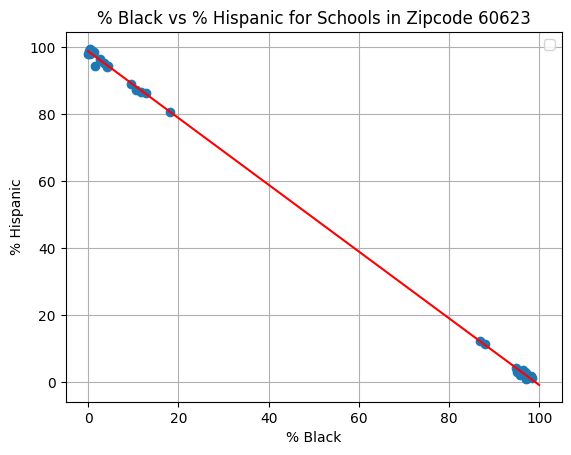

In [10]:
from sklearn.linear_model import LinearRegression #sklearn is a machine learning library
#Define the x and y values
X=df1[["%black"]]
Y=df1[["%hispanic"]]
#create the linear regression model
reg=LinearRegression()
reg.fit(X,Y)
print("Intercept is ", reg.intercept_)
print("Slope is ", reg.coef_)
print("R^2 for OLS is ", reg.score(X,Y))
# x values on the regression line will be between 0 and 100 with a spacing of .01
x = np.arange(0, 100 ,.01) 
# define the regression line y = mx+b here
[[m]]=reg.coef_
[b]=reg.intercept_
y =  m*x  + b   
# plot the school data
df1.plot(x='%black', y='%hispanic', style='o')  
plt.title('% Black vs % Hispanic for Schools in Zipcode 60623')  
plt.xlabel('% Black')  
plt.ylabel('% Hispanic')  
# plot the regression line 
plt.plot(x,y, 'r') #add the color for red
plt.legend([],[], frameon=True)
plt.grid()
plt.savefig("CPSregression1.png")
plt.show()

This scatterplot shows that the CPS schools considered in 60623 are either predominantly hispanic or predominantly black.

<b>Exercise 2)</b> Modify STEPS TWO through STEP FOUR to create a dataframe df2 and a scatterplot of % Black (x-axis) vs. % ''graduation_rate_school' (y-axis) in zip 60623.

In [11]:
#STEP TWO
df2=raw_CPS_data[['address','student_count_total','student_count_black','graduation_rate_school','zip']]
df2=df2[df2["zip"]==60623]
df2=df2.dropna()
df2=df2.reset_index(drop=True) #rows are labelled 0,1,2,... 
print("Total number of CPS schools considered in 60623 is",len(df2["zip"])) #len = length
print("Largest student_count_total = ",df2["student_count_total"].max())
print("Smallest student_count_total = ",df2["student_count_total"].min())
df2.head(2)

Total number of CPS schools considered in 60623 is 9
Largest student_count_total =  559
Smallest student_count_total =  100


,address,student_count_total,student_count_black,graduation_rate_school,zip
0,2345 S CHRISTIANA AVE,559,66,68.9,60623
1,3120 S KOSTNER AVE,319,41,86.5,60623


In [12]:
#STEP THREE
df2.columns= ["address","total","black","graduate","zip"]
for i in df2.index:
    df2.loc[i,'%black']=round(100*df2.loc[i,'black']/df2.loc[i,'total'],1)
df2.head(2)

,address,total,black,graduate,zip,%black
0,2345 S CHRISTIANA AVE,559,66,68.9,60623,11.8
1,3120 S KOSTNER AVE,319,41,86.5,60623,12.9


Intercept is  [82.47649769]
Slope is  [[-0.14939133]]
R^2 for OLS is  0.4294882066259431


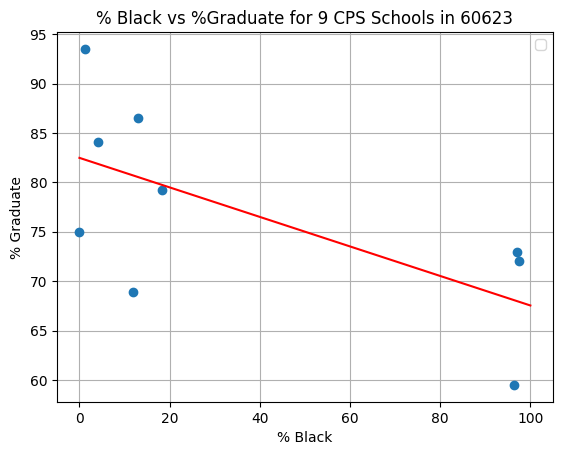

In [13]:
#STEP FOUR
from sklearn.linear_model import LinearRegression #sklearn is a machine learning library
X=df2[["%black"]]
Y=df2[["graduate"]]
reg=LinearRegression()
reg.fit(X,Y)
print("Intercept is ", reg.intercept_)
print("Slope is ", reg.coef_)
print("R^2 for OLS is ", reg.score(X,Y))
# x values on the regression line will be between 0 and 100 with a spacing of .01
x = np.arange(0, 100 ,.01) 
# define the regression line y = mx+b here
[[m]]=reg.coef_
[b]=reg.intercept_
y =  m*x  + b   
# plot the school data
df2.plot(x='%black', y='graduate', style='o')  
plt.title('% Black vs %Graduate for 9 CPS Schools in 60623')  
plt.xlabel('% Black')  
plt.ylabel('% Graduate')  
# plot the regression line 
plt.plot(x,y, 'r') #add the color for red
plt.legend([],[], frameon=True)
plt.grid()
plt.savefig("CPSregression2.png")
plt.show()

This shows graduates rates tend not to be as strong in the predominantly black schools in 60623.

<h3>Patterns in Mathematics</h3> (See Session3/Undergrad Curricular Resources/Calculus/Parametric Curves)

Interesting and beautiful patterns arise throughout mathematics. 

<h4> Parametric Curves</h4>

For example, a wide variety of patterns can be created using sine, cosine and exponential functions to define 2D parametric curves. (See the JNB Session Three/Calculus/Paramteric Curves)

The parametric equations

$x(t)=\cos(t)[3.5-1.5\mid\cos t\mid \sqrt{1.3+\mid\sin t\mid}+\cos(2t)-3\sin(t)+.7\cos(12.2t)]$

$y(t)=\sin(t)[3.5-1.5\mid\cos t\mid \sqrt{1.3+\mid\sin t\mid}+\cos(2t)-3\sin(t)+.7\cos(12.2t)]$

create a heart-shaped design. (Hit the blue icon at top right to stop the animation).

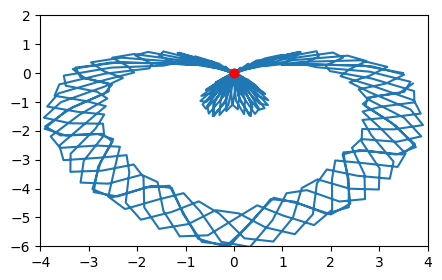

In [14]:
#-----Set Up Plot -----
%matplotlib inline
fig= plt.figure(figsize=(5,3)) 
plt.xlim(-4,4)
plt.ylim(-6,2)
#----Define the Parametric Equations------
t = np.arange(0, 12*np.pi, 0.1) #paramter values from 0 to 12$\pi$ in steps of ,1
xt=np.cos(t)*(3.5-1.5*abs(np.cos(t))*np.sqrt(1.3+abs(np.sin(t)))+np.cos(2*t)-3*np.sin(t)+.7*np.cos(12.2*t))     
yt=np.sin(t)*(3.5-1.5*abs(np.cos(t))*np.sqrt(1.3+abs(np.sin(t)))+np.cos(2*t)-3*np.sin(t)+.7*np.cos(12.2*t))   
plt.gca().plot(xt, yt)
#----Create a Red Dot to Trace the Curve------
def init():
    redDot, = plt.gca().plot([0], [0], 'ro') #starting position of dot
    return redDot,

def animate(i):
    redDot,= plt.gca().plot([np.cos(i)*(3.5-1.5*abs(np.cos(i))*np.sqrt(1.3+abs(np.sin(i)))+np.cos(2*i)-3*np.sin(i)+.7*np.cos(12.2*i))   ], [np.sin(i)*((3.5-1.5*abs(np.cos(i))*np.sqrt(1.3+abs(np.sin(i)))+np.cos(2*i)-3*np.sin(i)+.7*np.cos(12.2*i))  ) ],'ro',ms=2,alpha=1)
    return redDot,

# create animation using the animate() function
ani = animation.FuncAnimation(fig, animate, frames=np.arange(0,12*np.pi,.01), init_func=init, interval=5, blit=True, repeat=False)

plt.show()

<h4>Exercise 3a</h4>

What familiar object resembles the parametric curve traced out by the equations 

$x(t)=\sin(t)[e^{\cos t}-2\cos(4t)-\sin^5(t/12)]$,  

$y(t)=\cos(t)[e^{\cos t}-2\cos(4t)-\sin^5(t/12)]$

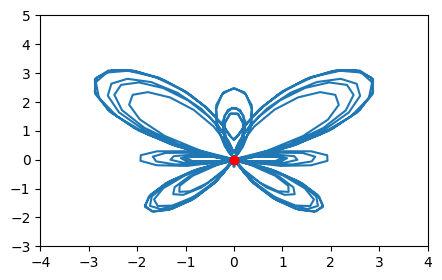

In [15]:
#Butterfly Curve
%matplotlib inline
#-----Set Up Plot -----
fig= plt.figure(figsize=(5,3))
plt.xlim(-4,4)
plt.ylim(-3,5)
##-----PARAMETRIC DEFINITION OF Butterfly CURVE------
t = np.arange(0, 12*np.pi, 0.1)
xt=np.sin(t)*(np.exp(np.cos(t))-2*np.cos(4*t)-(np.sin(t/12))**5)      
yt=np.cos(t)*(np.exp(np.cos(t))- 2*np.cos(4*t)-(np.sin(t/12))**5) 
plt.gca().plot(xt, yt)

def init():
    redDot, = plt.gca().plot([0], [0], 'ro') #starting position of dot
    return redDot,

def animate(i):
    redDot,= plt.gca().plot([np.sin(i)*(np.exp(np.cos(i))-2*np.cos(4*i)-(np.sin(i/12))**5) ], [np.cos(i)*(np.exp(np.cos(i))- 2*np.cos(4*i)-(np.sin(i/12))**5) ],'ro',ms=2,alpha=1)
    return redDot,

# create animation using the animate() function
ani = animation.FuncAnimation(fig, animate, frames=np.arange(0,12*np.pi,.01), init_func=init, interval=5, blit=True, repeat=False)

plt.show()

<h4> Quadric Surfaces</h4> (See Session3/Undergrad Curricular Resources/Calculus/Quadric Surfaces)

Quadric surfaces are another source of interesting patterns and can be constructed/analyzed using level curves. We can use the following function to plot quadric surfaces. The input variable fn is an expression in three variables (x,y,z). The function plot_implicit() plots the implicit relation fn=0 by plotting level curves parallel to the xy plane, xz plane, and yz plane.

In [16]:
def plot_implicit(fn, bbox=(-5,5),resolution=50):
    %matplotlib inline
    ''' create a plot of an implicit function
    fn  ...implicit function (plot where fn==0)
    bbox ..the x,y,and z limits of plotted interval'''
    xmin, xmax, ymin, ymax, zmin, zmax = bbox*3
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    A = np.linspace(xmin, xmax, resolution) # resolution of the contour
    B = np.linspace(xmin, xmax, resolution) # number of slices
    A1,A2 = np.meshgrid(A,A) # grid on which the contour is plotted

    for z in B: # plot level curves parallel to the XY plane
        X,Y = A1,A2
        Z = fn(X,Y,z)
        cset = ax.contour(X, Y, Z+z, [z], zdir='z')
        # [z] defines the only level to plot for this contour for this value of z

    for y in B: # plot level curves parallel the XZ plane
        X,Z = A1,A2
        Y = fn(X,y,Z)
        cset = ax.contour(X, Y+y, Z, [y], zdir='y')

    for x in B: # plot level curves parallel to the YZ plane
        Y,Z = A1,A2
        X = fn(x,Y,Z)
        cset = ax.contour(X+x, Y, Z, [x], zdir='x')

    # must set plot limits because the contour will likely extend
    # well beyond the displayed level.  Otherwise matplotlib extends the plot limits
    # to encompass all values in the contour.
    ax.set_zlim3d(zmin,zmax)
    ax.set_xlim3d(xmin,xmax)
    ax.set_ylim3d(ymin,ymax)

    plt.show()

For example, let us plot the elliptic paraboloid
\begin{equation}
z=(\frac{x}{2})^2+(\frac{y}{3})^2
\end{equation}  

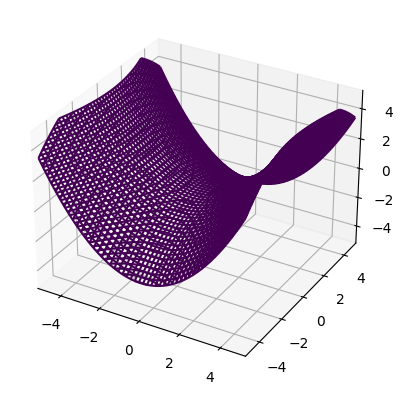

In [17]:
def hyperbolic_paraboloid(x,y,z):
    return (x/2)**2-(y/3)**2-z

plot_implicit(hyperbolic_paraboloid)

We can sketch the level curves of \begin{equation}
z=(\frac{x}{2})^2+(\frac{y}{3})^2
\end{equation}  as follows:

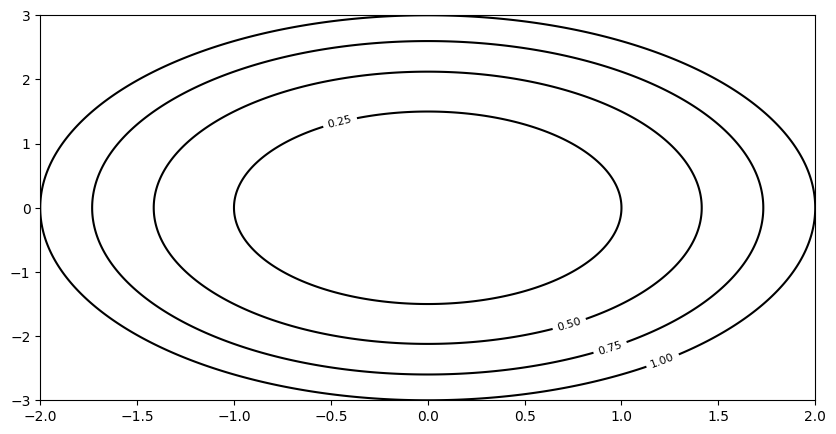

In [18]:
%matplotlib inline
plt.figure(figsize=(10,5))

#---Create grid points at which to evaluate the function z(x,y)
x = np.linspace(-2, 2, 250)
y = np.linspace(-3, 3, 250)
X, Y = np.meshgrid(x, y)
Z=(X/2)**2+(Y/3)**2
#--Create the Contours--
contours=plt.contour(X, Y, Z, levels=np.linspace(0,1,5), colors='black');
#---Plot the Dividing Streamline---------
plt.clabel(contours, inline=True, fontsize=8)
plt.savefig('hyparab.png')

<h4>Exercise 3b)</h4>
Make a sketch of the hyperboloid of one sheet defined by
\begin{equation}
(\frac{z}{4})^2=(\frac{x}{2})^2+(\frac{y}{3})^2-1.
\end{equation}

Then plot the level curves of the function 
\begin{equation}
z=4\sqrt{(\frac{x}{2})^2+(\frac{y}{3})^2-1}.
\end{equation}

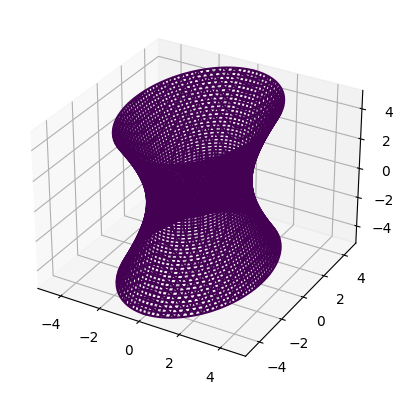

In [19]:
def hyperboloid_1sheet(x,y,z):
    return (x/2)**2+(y/3)**2-(z/4)**2-1

plot_implicit(hyperboloid_1sheet)

/var/folders/51/0j13g6f16lq97y1j31tmp7b40000gn/T/ipykernel_7135/1907764274.py:8: RuntimeWarning: invalid value encountered in sqrt
  Z=4*np.sqrt((X/2)**2+(Y/3)**2-1)


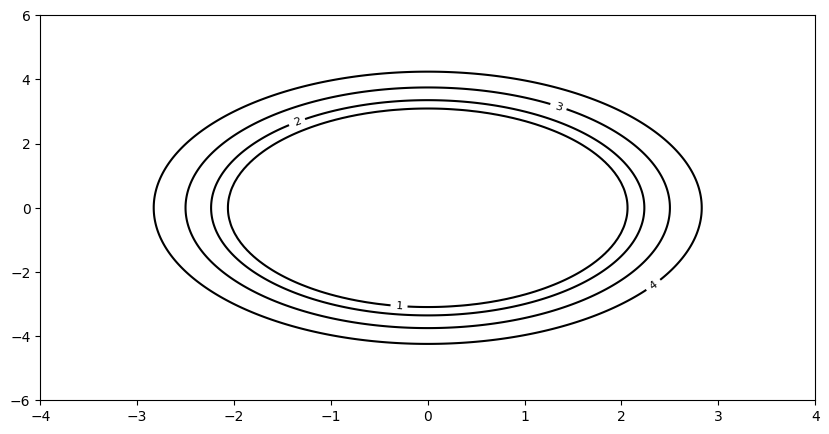

In [20]:
%matplotlib inline
plt.figure(figsize=(10,5))

#---Create grid points at which to evaluate the function z(x,y)
x = np.linspace(-4, 4, 250)
y = np.linspace(-6, 6, 250)
X, Y = np.meshgrid(x, y)
Z=4*np.sqrt((X/2)**2+(Y/3)**2-1)
#--Create the Contours--
contours=plt.contour(X, Y, Z, levels=np.linspace(0,4,5), colors='black');
#---Plot the Dividing Streamline---------
plt.clabel(contours, inline=True, fontsize=8)
plt.savefig('hyperb1.png')

<h3> 4. Connecting Patterns in Mathematics to Patterns in Nature and Society</h3>

In complex variables, we study functions of a complex variable $f(z)=f(x+iy)=u(x,y)+iv(x,y)$  which map a complex variable z=x+iy represented by a point (x,y) in the complex plane to another complex variable $u+iv$ modeled as a point (u,v) in another complex plane.

Such functions have wide ranging applications including applications to analysis of 2-dimensional fluid flow.  

The following function $\Omega(z)$ called a "complex potential" can be used to model a scenarios where there is a source of pollution located at (-1,0) as well an extraction well or sink of equal strength located at (1,0).

\begin{equation}
\Omega(z) = -z - 2\ln(z+1) + 2\ln(z-1)
\end{equation}

The imaginary part of $\Omega$ is called the stream function $\Psi$.
The level curves of $\Psi$ are called streamlines, and model the path along which the fluid particles flow.

We can plot the streamlines as follows:

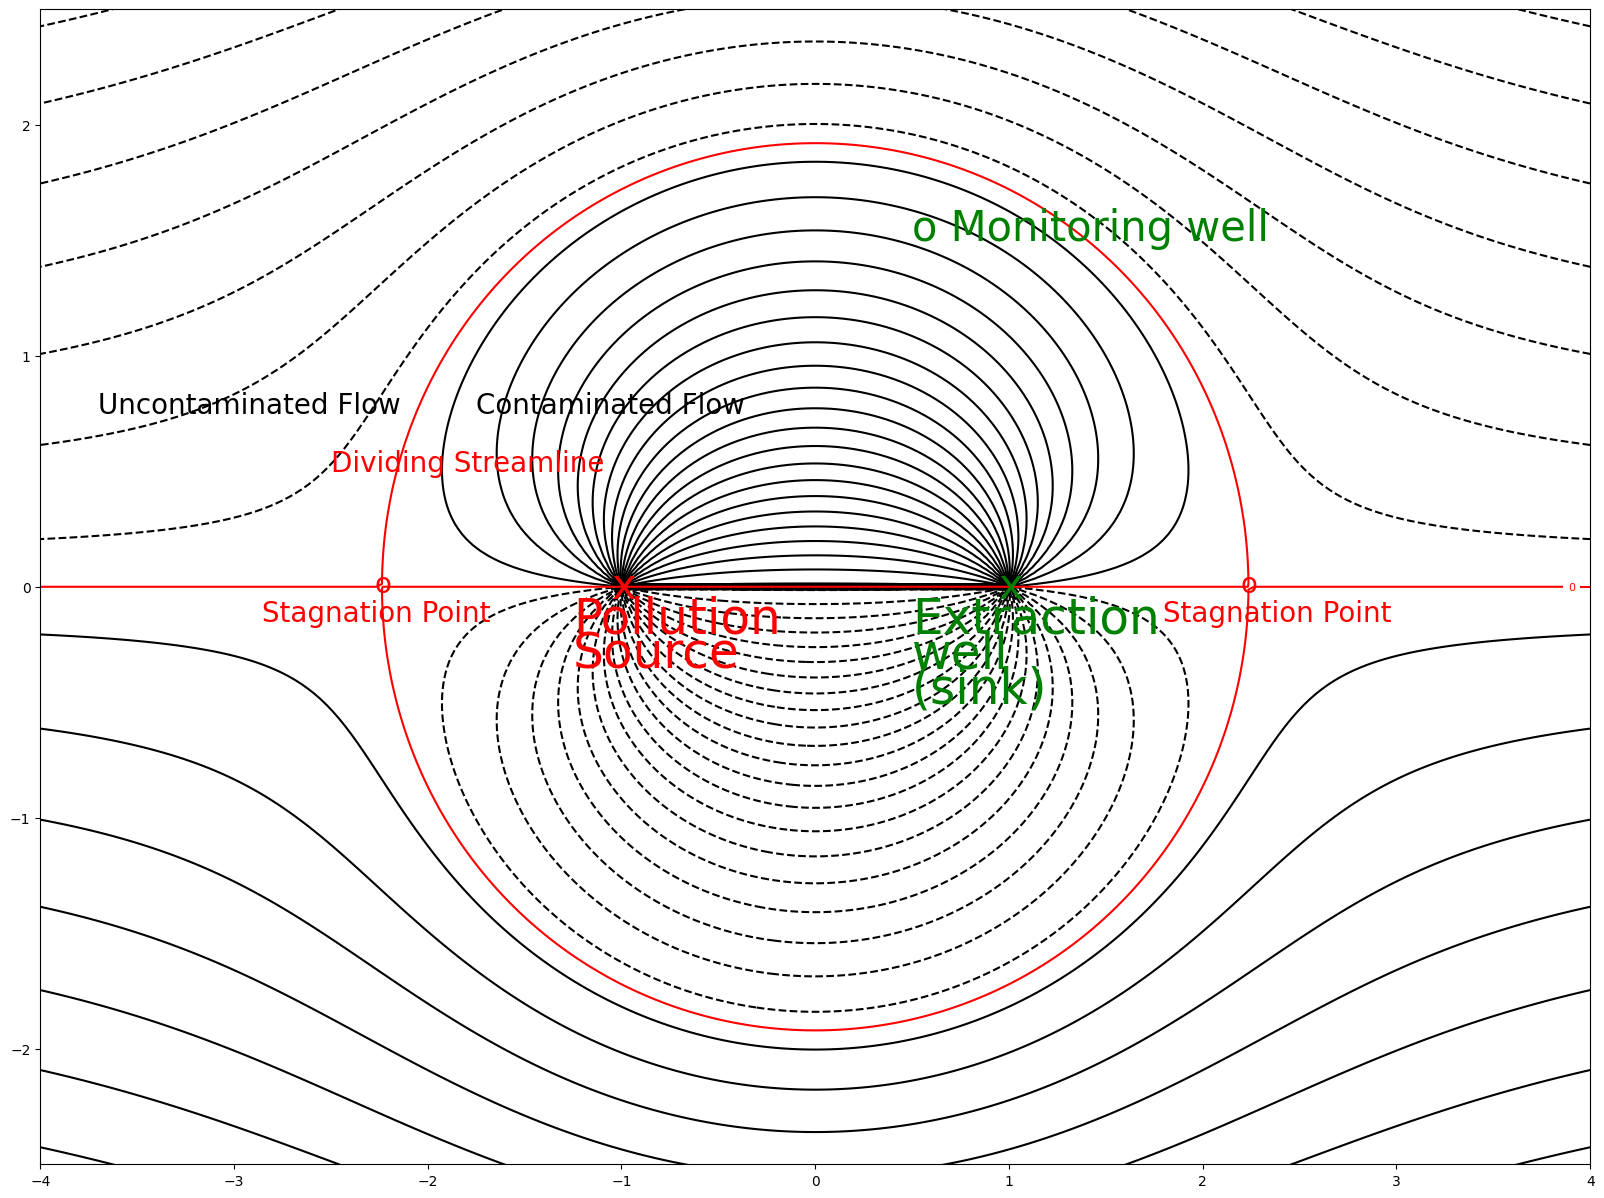

In [23]:
%matplotlib inline
plt.figure(figsize=(20,15))
#---Position for the source---
plt.text(-1.05,-.05,'x',color='r',size=30)
plt.text(-1.25,-.2,'Pollution',color='r',size=35)
plt.text(-1.25,-.35,'Source',color='r',size=35)
plt.xlim(-4, 4)
plt.ylim(-2.5,2.5)
#---Position for the sink---
plt.text(.95,-.05,'x',color='g',size=30)
plt.text(.5,-.2,'Extraction',color='g',size=35)
plt.text(.5,-.35,'well',color='g',size=35)
plt.text(.5,-.5,'(sink)',color='g',size=35)

#---Position for the monitoring well---
plt.text(.5,1.5,'o Monitoring well',color='g',size=30)

#---Create grid points at which to evaluate the streamfunction Psi(x,y)
x = np.linspace(-4, 4, 250)
y = np.linspace(-3, 3, 250)
X, Y = np.meshgrid(x, y)
Psi = -Y-2*np.arctan2(Y,(X+1))+2*np.arctan2(Y,(X-1))
#--Create the Contours--
contours=plt.contour(X, Y, Psi, levels=np.linspace(-15,15,100), colors='black');
#---Plot the Dividing Streamline---------
contours=plt.contour(X,Y,Psi,levels=0,colors='red');
plt.text(-2.5,.5,'Dividing Streamline',color='r',size=20)
plt.text(-2.275,-.024,'o',color='r',size=20)
plt.text(2.195,-.024,'o',color='r',size=20)
plt.text(-2.9,-.15,' Stagnation Point',color='r',size=20)
plt.text(1.75,-.15,' Stagnation Point',color='r',size=20)
plt.text(-1.75,.75,'Contaminated Flow',color='k',size=20)
plt.text(-3.7,.75,'Uncontaminated Flow',color='k',size=20)

plt.clabel(contours, inline=True, fontsize=8)
plt.savefig('rankine.png')

Note that the extraction well is sufficiently strong to capture all the pollution streamlines. The boundary between the polluted streamlines and fresh water streamlines is called a "Rankine Oval."

<h4>Exercise 4</h4>
The JNB "Space-Leasing Plume" in the SESSION 4 REUs/ Groundwater Contaminant Extraction Model Using Complex Potentials folder was part of an REU study of the Fischer-Calo Superfund site.  This work appears in an ILAP Module published in the UMAP Journal 43.1.  Based on this lab and ILAP Module, explain the difference between an Ineffective, Regular, and Inefficient system.

An ineffective system is one in which the two extraction wells (one mid-plume and one midstream) are not strong enough to capture all the pollution detected by the monitoring wells.

A regular system is one where the two extractions working together are sufficient to capture all the pollution.

An inefficient system is one where the mid-plume extraction well could be turned off, and the downstream extraction well by itself is sufficiently strong to capture all the pollution.